In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list
)

c:\Users\DELL\anaconda3\envs\data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\DELL\AppData\Local\Temp\ipykernel_23252\1918938237.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


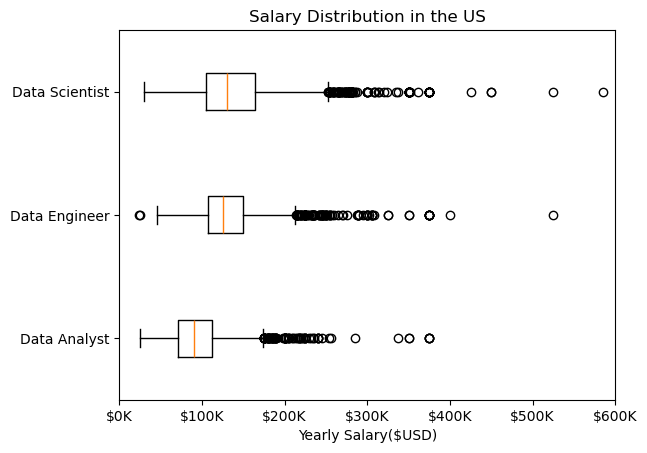

In [20]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x / 1000)}K'))
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary($USD)')
plt.xlim(0, 600000)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23252\71014292.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_us['salary_hour_avg'], labels=['Data Scientist'], vert=False)


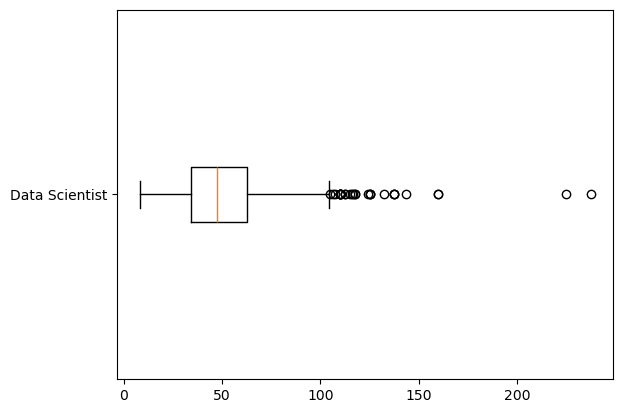

In [ ]:
df_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_us = df_us.dropna(subset=['salary_hour_avg'])

plt.boxplot(df_us['salary_hour_avg'], labels=['Data Scientist'], vert=False)
plt.show()